In [43]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random



In [76]:
n= 3
p= 0.394
B=np.zeros(2**n+2)
A=np.array([2*np.ones(2**n)])
A=np.append([0],A)
A=np.append(A,[0])

A= np.vstack((B,A))

print(A)
print(B)
for i in range(2**n):
    A= np.vstack((A,B))
    


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 2. 2. 2. 2. 2. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [77]:
print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 2. 2. 2. 2. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


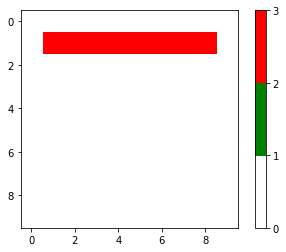

In [78]:
cmap = mpl.colors.ListedColormap(['white','green','red'])
bounds=[0,1,2,3]

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(A,interpolation='nearest',
                    cmap = cmap,norm=norm)
plt.colorbar(img,cmap=cmap,
                norm=norm,boundaries=bounds,ticks=[0,1,2,3])

# Percolation 1a) #
                


# The density of the treearea depends on the probabilty p of the growth of trees. Through neglectable ligthning the only source of destruction is the fire line at the border of the grid. The bigger the growth rate of the trees are, the bigger is the destruction rate of the fire. For lower growth rate, the destruction of the fire needs more time (timesteps) to eliminate a bigger area of trees. For low p the cluster size of trees should be bigger, in average. In total the cluster size/ tree density is oscillating with the time, and the periode of the oscillation gets bigger with lower probability#

In [93]:

def fire(A,T,p,n):
    total= (2**n)*(2**n)
    roh=[]
    for t in np.arange(T):
        for i in range(1,2**n):
            for k in range(1,2**n):
                if A[i][k]==0:
                    if random.random()<= p:
                        A[i][k]=1
                    continue
                elif A[i][k]==1:
                    #try:
                    if (A[i-1][k]==2)or(A[i+1][k]==2)or(A[i][k-1]==2)or(A[i][k+1]==2):
                        A[i][k]=2
                    continue
                    #except:
                    #pass
        for i in range(2,2**n):
            for k in range(1,2**n):
                if A[i][k]==2:
                    A[i][k]=0
        C=list(A)
        tree=sum(list(x).count(1) for x in C)
        roh.append(tree/total)
    return roh
                

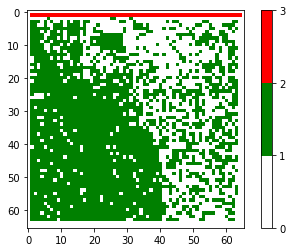

In [166]:
n= 6
p= 0.075
T=5000
B=np.zeros(2**n+2)
A=np.array([2*np.ones(2**n)])
A=np.append([0],A)
A=np.append(A,[0])

A= np.vstack((B,A))

for i in range(2**n):
    A= np.vstack((A,B))

roh=fire(A,T,p,n)

cmap = mpl.colors.ListedColormap(['white','green','red'])
bounds=[0,1,2,3]

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(A,interpolation='nearest',
                    cmap = cmap,norm=norm)
plt.colorbar(img,cmap=cmap,
                norm=norm,boundaries=bounds,ticks=[0,1,2,3])
plt.show()

In [167]:
print(np.mean(roh))

0.53669921875


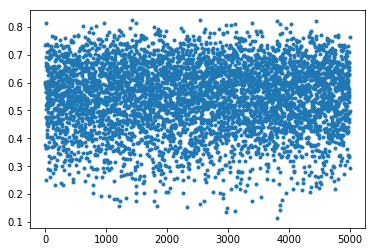

In [107]:
plt.plot(range(T),roh,linestyle='None', marker='.')

In [109]:
p= 0.075
T=5000
N=[2,3,4,5,6,7]


    
ROH=[]
for n in N:
    B=np.zeros(2**n+2)
    A=np.array([2*np.ones(2**n)])
    A=np.append([0],A)
    A=np.append(A,[0])
    A= np.vstack((B,A))

    for i in range(2**n):
        A= np.vstack((A,B))
        
    ROH.append(fire(A,T,p,n))

# 1b) #

Text(0, 0.5, 'Forest density')

<Figure size 1440x1440 with 0 Axes>

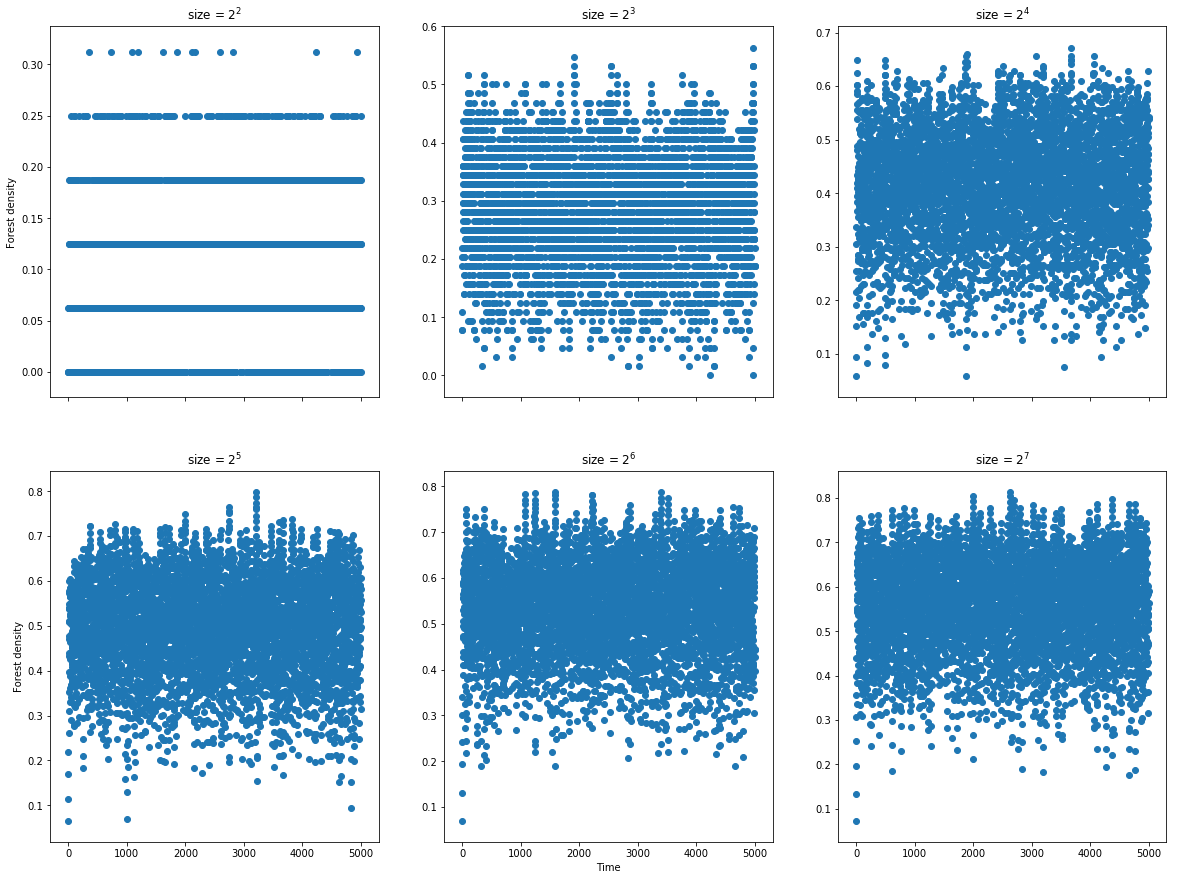

In [144]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(2, 3, sharex='col')
fig.set_figheight(15)
fig.set_figwidth(20)
ax[0,0].scatter(range(T),ROH[0], label=r'2^2' )
ax[0,0].title.set_text(r'size = $2^2$')

ax[0,1].scatter(range(T),ROH[1], label=r'2^3' )
ax[0,1].title.set_text(r'size = $2^3$')
ax[0,2].scatter(range(T),ROH[2], label=r'2^4' )
ax[0,2].title.set_text(r'size = $2^4$')
ax[1,0].scatter(range(T),ROH[3], label=r'2^5' )
ax[1,0].title.set_text(r'size = $2^5$')
ax[1,1].scatter(range(T),ROH[4], label=r'2^6' )
ax[1,1].title.set_text(r'size = $2^6$')
ax[1,2].scatter(range(T),ROH[5], label=r'2^7' )
ax[1,2].title.set_text(r'size = $2^7$')
ax[1,1].set_xlabel('Time')
ax[0,0].set_ylabel(r'Forest density')
ax[1,0].set_ylabel(r'Forest density')
    

# 1c) #

In [147]:
av_roh=[]
sigma=[]
for i in ROH:
    av_roh.append(np.mean(i))
    sigma.append(np.var(i))

Text(0.5, 0, 'n')

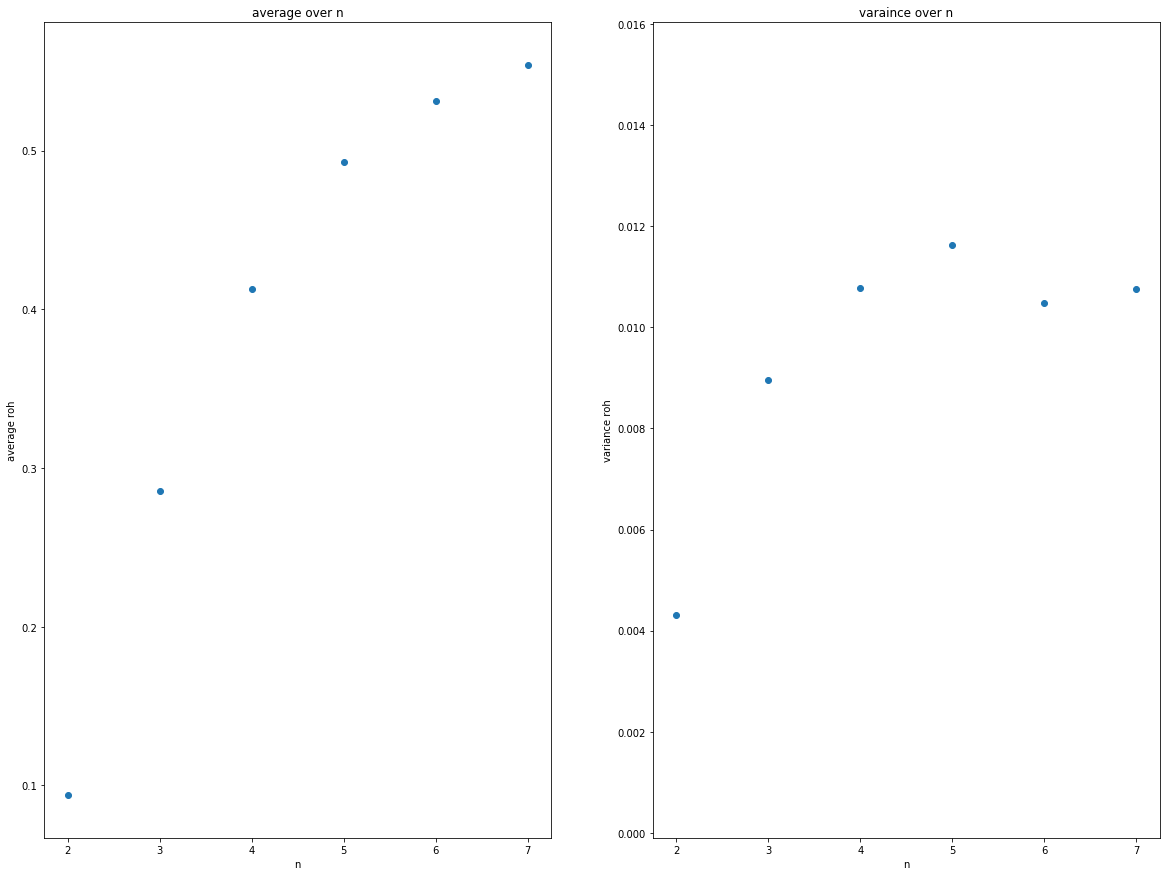

In [155]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(15)
fig.set_figwidth(20)

ax[0].scatter(N,av_roh)
ax[0].title.set_text(r'average over n')
ax[0].set_ylabel('average roh')
ax[0].set_xlabel('n')
ax[1].scatter(N,sigma)
ax[1].title.set_text(r'varaince over n')
ax[1].set_ylabel('variance roh')
ax[1].set_xlabel('n')


# 1d)#

# The differences between the 5- and 9-neighborhood is a more rapid destruction of the fire. The possibility that a tree becomes fire is bigger than for the smaller 5-neighborhood. Because of the bigger probability the all over average density must be smaller.#

In [161]:
def fire2(A,T,p,n):
    total= (2**n)*(2**n)
    roh=[]
    for t in np.arange(T):
        for i in range(1,2**n):
            for k in range(1,2**n):
                if A[i][k]==0:
                    if random.random()<= p:
                        A[i][k]=1
                    continue
                elif A[i][k]==1:
                    #try:
                    if (A[i-1][k]==2)or(A[i+1][k]==2)or(A[i][k-1]==2)or(A[i][k+1]==2)or(A[i+1][k+1]==2)or(A[i-1][k-1])or (A[i-1][k+1]==2) or (A[i+1][k-1]):
                        A[i][k]=2
                    continue
                    #except:
                    #pass
        for i in range(2,2**n):
            for k in range(1,2**n):
                if A[i][k]==2:
                    A[i][k]=0
        C=list(A)
        tree=sum(list(x).count(1) for x in C)
        roh.append(tree/total)
    return roh
                

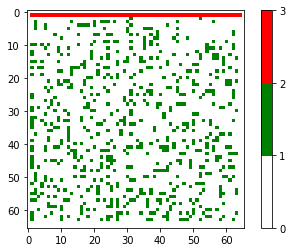

In [162]:
n= 6
p= 0.075
T=5000
B=np.zeros(2**n+2)
A=np.array([2*np.ones(2**n)])
A=np.append([0],A)
A=np.append(A,[0])

A= np.vstack((B,A))

for i in range(2**n):
    A= np.vstack((A,B))

roh=fire2(A,T,p,n)

cmap = mpl.colors.ListedColormap(['white','green','red'])
bounds=[0,1,2,3]

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(A,interpolation='nearest',
                    cmap = cmap,norm=norm)
plt.colorbar(img,cmap=cmap,
                norm=norm,boundaries=bounds,ticks=[0,1,2,3])
plt.show()

In [165]:
print(np.mean(roh))

0.15730009765625
